In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./result-single.csv')

In [3]:
data = data[data['uptime'] > 0]
data

,rrt sampling,alpha,field size,num mobiles,num statics,num obstacles,obstacles,trial,uptime,elapsed time
0,1000,0.0,"[600, 400]",20,0,0,./obstacles.json,#0,667845,0.066022
1,1000,0.0,"[600, 400]",20,0,0,./obstacles.json,#1,612234,0.107481
2,1000,0.0,"[600, 400]",20,0,0,./obstacles.json,#2,618172,0.177498
3,1000,0.0,"[600, 400]",20,0,0,./obstacles.json,#3,669903,0.075872
4,1000,0.0,"[600, 400]",20,0,0,./obstacles.json,#4,604723,0.154680
...,...,...,...,...,...,...,...,...,...,...
10645,1000,0.0,"[600, 400]",40,40,35,./obstacles.json,#45,701816,2.085319
10659,1000,0.0,"[600, 400]",40,40,35,./obstacles.json,#59,706470,6.065595
10678,1000,0.0,"[600, 400]",40,40,35,./obstacles.json,#78,686740,2.380805
10736,1000,0.0,"[600, 400]",40,40,40,./obstacles.json,#36,671180,1.247399


In [4]:
data_mean = data.drop(['trial', 'field size'], axis=1).groupby(
  ['num mobiles', 'num statics', 'num obstacles'], as_index=False).mean()
data_mean

,num mobiles,num statics,num obstacles,rrt sampling,alpha,uptime,elapsed time
0,20,0,0,1000.0,0.0,646653.100000,0.107474
1,20,0,5,1000.0,0.0,637815.737705,0.229298
2,20,0,10,1000.0,0.0,640053.976190,0.294131
3,20,0,15,1000.0,0.0,633627.388889,0.406531
4,20,0,20,1000.0,0.0,599377.000000,0.437323
...,...,...,...,...,...,...,...
100,40,40,20,1000.0,0.0,700982.142857,2.172791
101,40,40,25,1000.0,0.0,695815.000000,1.829772
102,40,40,30,1000.0,0.0,690557.166667,1.989614
103,40,40,35,1000.0,0.0,696497.400000,3.106198


In [5]:
mean5obs = data_mean.groupby('num obstacles').get_group(5)
mean10obs = data_mean.groupby('num obstacles').get_group(10)

In [6]:
mean5obs

,num mobiles,num statics,num obstacles,rrt sampling,alpha,uptime,elapsed time
1,20,0,5,1000.0,0.0,637815.737705,0.229298
9,20,20,5,1000.0,0.0,636891.565217,0.246130
17,20,30,5,1000.0,0.0,637186.451613,0.239366
25,20,40,5,1000.0,0.0,644850.356164,0.248347
34,30,0,5,1000.0,0.0,687630.633803,0.535877
43,30,20,5,1000.0,0.0,688378.422535,0.558261
52,30,30,5,1000.0,0.0,689777.188406,0.501401
61,30,40,5,1000.0,0.0,690352.594203,0.527770
70,40,0,5,1000.0,0.0,704521.861538,1.211154
79,40,20,5,1000.0,0.0,703841.716418,1.078149


In [7]:
mean10obs

,num mobiles,num statics,num obstacles,rrt sampling,alpha,uptime,elapsed time
2,20,0,10,1000.0,0.0,640053.976190,0.294131
10,20,20,10,1000.0,0.0,633525.363636,0.321536
18,20,30,10,1000.0,0.0,636124.375000,0.300419
26,20,40,10,1000.0,0.0,646078.566667,0.317073
35,30,0,10,1000.0,0.0,688463.826087,0.758866
44,30,20,10,1000.0,0.0,686602.555556,0.681958
53,30,30,10,1000.0,0.0,688875.027778,0.738417
62,30,40,10,1000.0,0.0,690722.543478,0.741827
71,40,0,10,1000.0,0.0,703915.395833,1.488010
80,40,20,10,1000.0,0.0,702933.377778,1.605065


In [8]:
mean10obs['uptime'].values.reshape((3, 4))

array([[640053.97619048, 633525.36363636, 636124.375     ,
        646078.56666667],
       [688463.82608696, 686602.55555556, 688875.02777778,
        690722.54347826],
       [703915.39583333, 702933.37777778, 702270.64864865,
        703391.        ]])

In [9]:
def plot_uptimes(n_obs):
  data = data_mean.groupby('num obstacles').get_group(n_obs)
  uptimes = data['uptime'].values.reshape((3, 4)) / 3600
  num_mobiles= data['num mobiles'].values
  num_statics = data['num statics'].values

  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111)
  ax.imshow(uptimes, cmap='GnBu')
  ax.set_xticks(np.arange(uptimes.shape[1]))
  ax.set_xticklabels(['0', '20', '30', '40'])
  ax.set_yticks(np.arange(uptimes.shape[0]))
  ax.set_yticklabels(['20', '30', '40'])
  ax.set_xlabel('Number of static sensors')
  ax.set_ylabel('Number of mobile sensors')
  ax.set_title('Uptime [hour]')
  
  for i in range(uptimes.shape[0]):
    for j in range(uptimes.shape[1]):
      ax.text(j, i, '{:.2f}'.format(uptimes[i][j]), ha='center', va='center', color='black')
  plt.show()

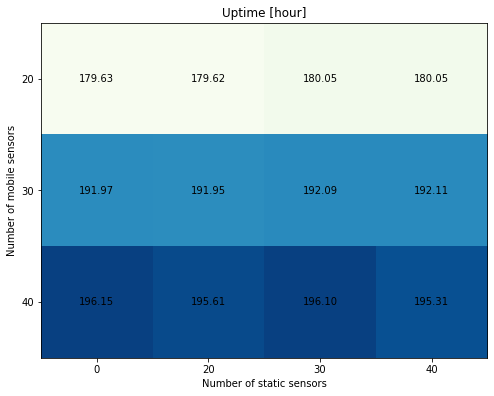

In [10]:
plot_uptimes(0)

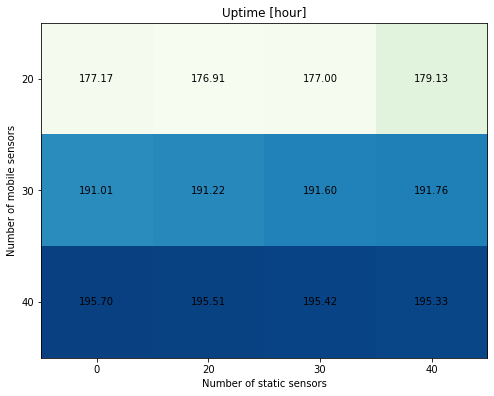

In [11]:

plot_uptimes(5)

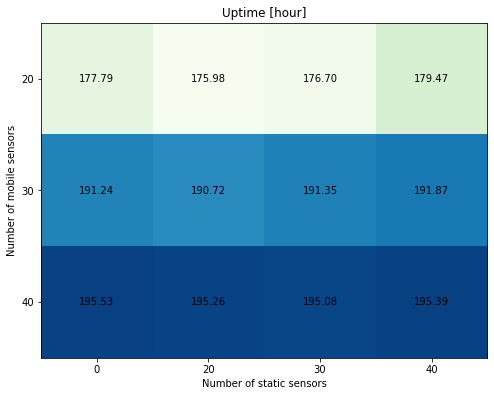

In [12]:
plot_uptimes(10)

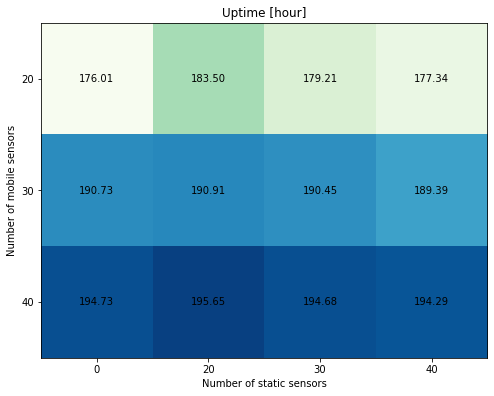

In [13]:
plot_uptimes(15)

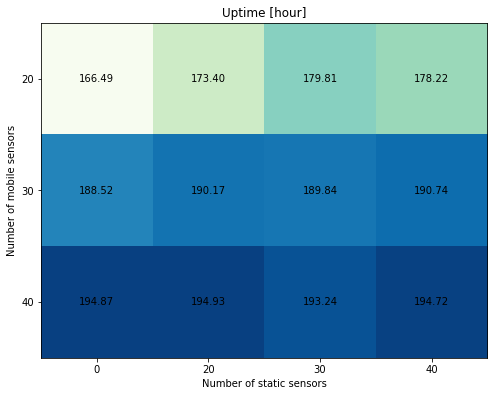

In [14]:

plot_uptimes(20)

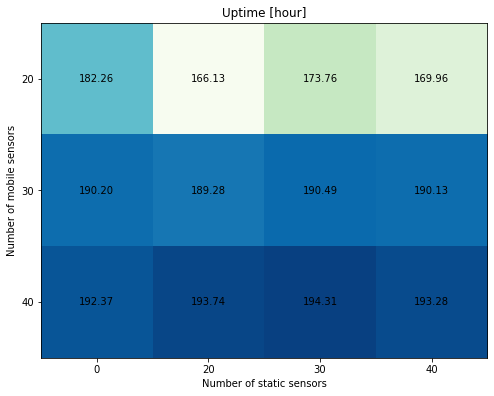

In [15]:

plot_uptimes(25)

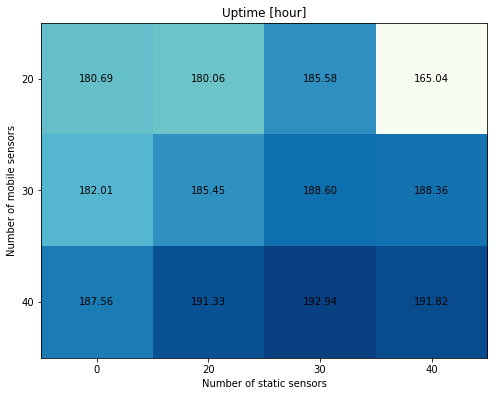

In [16]:
plot_uptimes(30)

In [17]:

plot_uptimes(35)

ValueError: cannot reshape array of size 11 into shape (3,4)

In [18]:

plot_uptimes(40)

ValueError: cannot reshape array of size 10 into shape (3,4)

In [19]:
data = pd.read_csv('./result-single.csv')
data[data['uptime'] > 0].drop(['elapsed time', 'alpha', 'rrt sampling', 'field size', 'obstacles', 'trial'], axis=1).groupby(['num mobiles', 'num statics', 'num obstacles']).count()

uptime
num mobiles num statics num obstacles        
20          0           0                 100
                        5                  61
                        10                 42
                        15                 18
                        20                  9
...                                       ...
40          40          20                 21
                        25                 11
                        30                  6
                        35                  5
                        40                  2

[105 rows x 1 columns]